SPRINT 8 - PROYECTO

PASO 4. Análisis exploratorio de datos (Python)

Cargar librerias y configuracion para graficos

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

Importar los archivos

In [51]:
df_taxis = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_8_Introducción_a_la_recopilacion_y_el_almacenamiento_de_datos_SQL\moved_project_sql_result_01.csv")
df_barrios = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_8_Introducción_a_la_recopilacion_y_el_almacenamiento_de_datos_SQL\moved_project_sql_result_04.csv")

Explorar los datasets

In [52]:
print("Primer dataset - Compañías de taxis")
print(df_taxis.head())
print(df_taxis.info())
print(df_taxis.describe())


Primer dataset - Compañías de taxis
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [53]:
print("Segundo dataset - Barrios de Chicago")
print(df_barrios.head())
print(df_barrios.info())
print(df_barrios.describe())

Segundo dataset - Barrios de Chicago
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


Asegurar que los datos sean correctos

In [54]:
df_taxis['trips_amount'] = pd.to_numeric(df_taxis['trips_amount'], errors='coerce')
df_barrios['average_trips'] = pd.to_numeric(df_barrios['average_trips'], errors='coerce')

Identificar los 10 barrios principales por finalización del recorrido

In [55]:
top10_barrios = df_barrios.sort_values(by='average_trips', ascending=False).head(10)

Graficos

Grafico de empresas de taxis y numeros de viajes

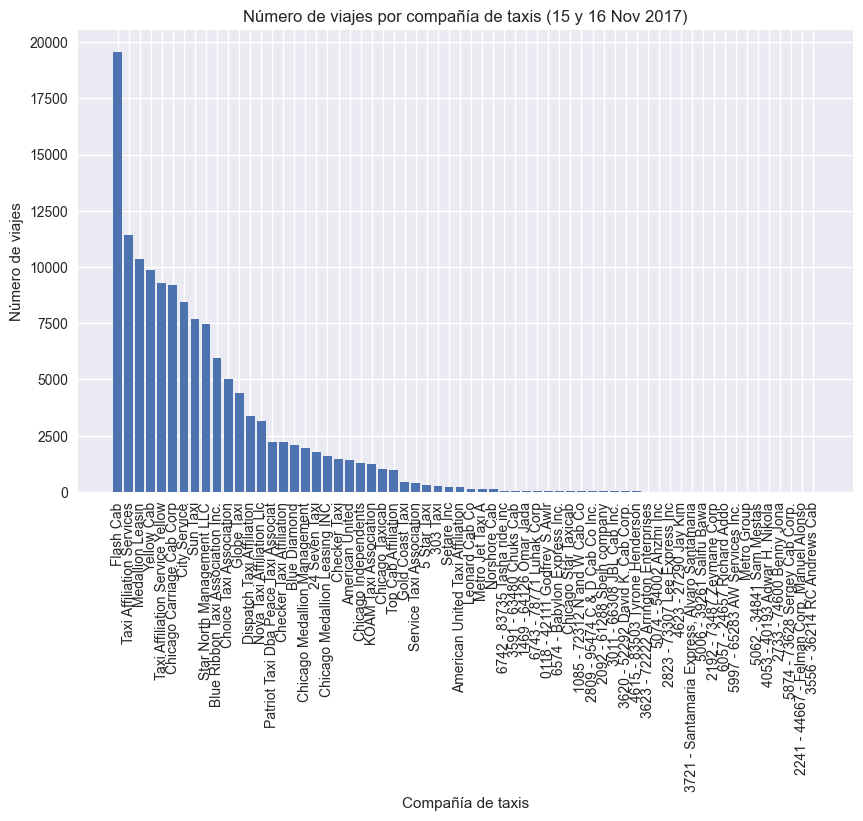

In [56]:
df_taxis_sorted = df_taxis.sort_values(by='trips_amount', ascending=False)

plt.bar(df_taxis_sorted['company_name'], df_taxis_sorted['trips_amount'])
plt.xticks(rotation=90)
plt.title("Número de viajes por compañía de taxis (15 y 16 Nov 2017)")
plt.xlabel("Compañía de taxis")
plt.ylabel("Número de viajes")
plt.show()

Grafico de los 10 barrios principales por finalización de viajes

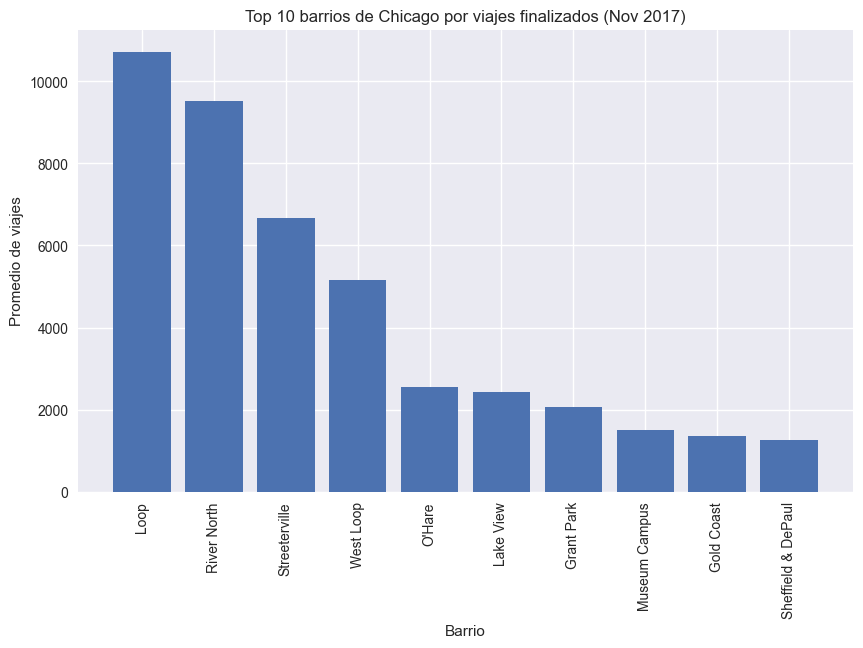

In [57]:
plt.bar(top10_barrios['dropoff_location_name'], top10_barrios['average_trips'])
plt.xticks(rotation=90)
plt.title("Top 10 barrios de Chicago por viajes finalizados (Nov 2017)")
plt.xlabel("Barrio")
plt.ylabel("Promedio de viajes")
plt.show()

Conclusiones:

Basandonos en la representación grafica, podemos decir que algunas de las compañias concentran un porcentaje mayor en el mercqado, es decir tienen mayor participacion en el mercadod e viajes, sin embargo hay otras compañias de viajes que tienen una participaciond e viajes menor, por lo que podemos decir que hay las famosas big4, en el ambito de de viajes basandonos en el nuemro de participacion del mercado de viajes

Ahora bien, lso 10 principales barrios muestran claramente donde se concentra la demanda de viejes, y este indicado r es clave para entender patrones de movilidad en la ciudad, y asi poder tomar estrategias usando leyes coomo la de oferta y demanda dependiendo el barrio

_____________________________________________________________________________________________________

Paso 5. Prueba de hipótesis (Python)

Carga de datos

In [58]:
df = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_8_Introducción_a_la_recopilacion_y_el_almacenamiento_de_datos_SQL\moved_project_sql_result_07.csv")

Convertir tipo de datos a datetime, y filtrar solo por el día sabado

In [59]:
df['start_ts'] = pd.to_datetime(df['start_ts'])
df['day_of_week'] = df['start_ts'].dt.day_name()
saturdays = df[df['day_of_week'] == 'Saturday']

Dividir en grupos: lluvia vs no lluvia y calculo el promedio para lluvia y no lluvia para prueba de hipotesis

In [60]:
rain = saturdays[saturdays['weather_conditions'].str.contains('Rain', case=False, na=False)]
no_rain = saturdays[~saturdays['weather_conditions'].str.contains('Rain', case=False, na=False)]

Prueba de hipotesis

In [61]:
# Prueba de hipótesis: Welch’s t-test
stat, p_value = stats.ttest_ind(rain['duration_seconds'], 
                                no_rain['duration_seconds'], 
                                equal_var=False)

print("\nEstadístico t:", stat)
print("p-value:", p_value)

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: la duración promedio de los viajes SÍ cambia los sábados lluviosos.")
else:
    print("No hay evidencia suficiente para rechazar H₀: la duración promedio NO cambia.")


Estadístico t: nan
p-value: nan
No hay evidencia suficiente para rechazar H₀: la duración promedio NO cambia.


C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Conclusion:

Se planteo como hipótesis nula que la duracion proimeido de viajes desde el LOOP hasta el AEROPUERTO, en sabados lluviosos es igual al de los sabdos sin lluvia, por lo que la forma laternativa es que las duraciones sean diferentes, se uso una prueba t, y se establecio un nivel de significacia de 0.05.

La hipotesis se cumple o no:, el valor p, se establece como criterio de decisión, como si el valor p es menor a 0.05, se rechaza la hipotesis de que los vuelos lluviosos y no lluviosos en sabado tienen la misma duración, y por lo tanto se concluye que las duraciones de los vuelos son diferentes de forma significativa, en caso contrario no se rechaza la hipotesis de que los vuelos tienen la misma duración y por lo tanto no hay evidencia sufieciente para afirmar que la duración promedio cambie en dias lluviosos